# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [8]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, ), (0.5, ))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
print(len(testset))
print(len(testloader))

10000
157


Here we can see one of the images.

# This dictionary maps the integer labels to their string names,
# as defined by the creators of the Fashion-MNIST dataset.
class_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


tensor(1)
Trouser


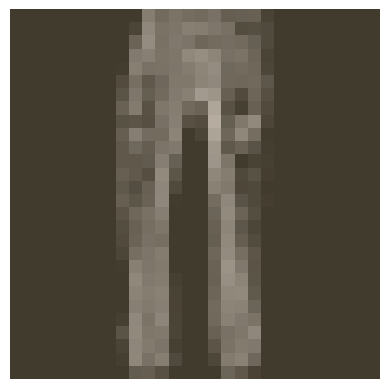

In [9]:
class_mapping = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

image, label = next(iter(trainloader))
print(label[0])
print(class_mapping[int(label[0])])
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [10]:
# TODO: Define your network architecture here
import torch
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 128),
                      nn.ReLU(),
                      nn.Linear(128, 128),
                      nn.ReLU(),
                      nn.Linear(128, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))  #dim=1 oder 0? wieso

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))  #dim=1 oder 0? wieso

model1 = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim=1))  #dim=1 oder 0? wieso




# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [11]:
# TODO: Create the network, define the criterion and optimizer
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

1.criterion = nn.NLLLoss()•criterion (Kriterium) ist hier die Verlustfunktion (Loss Function). Ihre Aufgabe ist es zu messen, wie stark die Vorhersage des Modells von der tatsächlichen Wahrheit (den labels) abweicht. Ein hoher Wert bedeutet eine große Abweichung (schlechte Vorhersage), ein niedriger Wert eine geringe Abweichung (gute Vorhersage).•nn.NLLLoss steht für Negative Log Likelihood Loss. Diese Verlustfunktion wird häufig für Klassifizierungsprobleme eingesetzt. Sie erwartet als Input logarithmische Wahrscheinlichkeiten, weshalb sie perfekt mit der nn.LogSoftmax-Aktivierungsfunktion in der letzten Schicht deines Modells zusammenspielt.


2.optimizer = optim.SGD(model.parameters(), lr=0.003)•

Der optimizer (Optimierer) ist der Algorithmus, der die Gewichte und Biases (also die Parameter) deines Modells anpasst, um den von der criterion berechneten Verlust zu minimieren.•optim.SGD steht für Stochastic Gradient Descent (Stochastisches Gradientenabstiegsverfahren), ein fundamentaler und weit verbreiteter Optimierungsalgorithmus.•model.parameters(): Damit teilst du dem Optimierer mit, welche Parameter er während des Trainings aktualisieren soll – in diesem Fall alle trainierbaren Parameter deines Modells.

•lr=0.003: lr ist die Learning Rate (Lernrate). Sie ist ein entscheidender Hyperparameter, der die Schrittgröße bei der Anpassung der Gewichte steuert. Eine zu hohe Lernrate kann das Training instabil machen, während eine zu niedrige es stark verlangsamen kann.Zusammengefasst legst du mit diesen beiden Zeilen fest, wie der Fehler des Modells gemessen (NLLLoss) und wie das Modell aus diesem Fehler lernen soll (SGD), um sich zu verbessern.

In [12]:
 # TODO: Train the network here
epochs = 20
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # TODO: Training pass
        optimizer.zero_grad()

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5170466204537257
Training loss: 0.39540875788881324
Training loss: 0.35959597462530074
Training loss: 0.3380433243872133
Training loss: 0.32116428590310153
Training loss: 0.3088118748497099
Training loss: 0.29570201500805454
Training loss: 0.28543100146247125
Training loss: 0.27575427567812677
Training loss: 0.27199091833791755
Training loss: 0.26408997058931954
Training loss: 0.2596789124900344
Training loss: 0.2555856726793592
Training loss: 0.25003422126928565
Training loss: 0.24234745225736073
Training loss: 0.2354995871006426
Training loss: 0.2310293002733226
Training loss: 0.23124822158056663
Training loss: 0.2235306906881236
Training loss: 0.2224540297132629


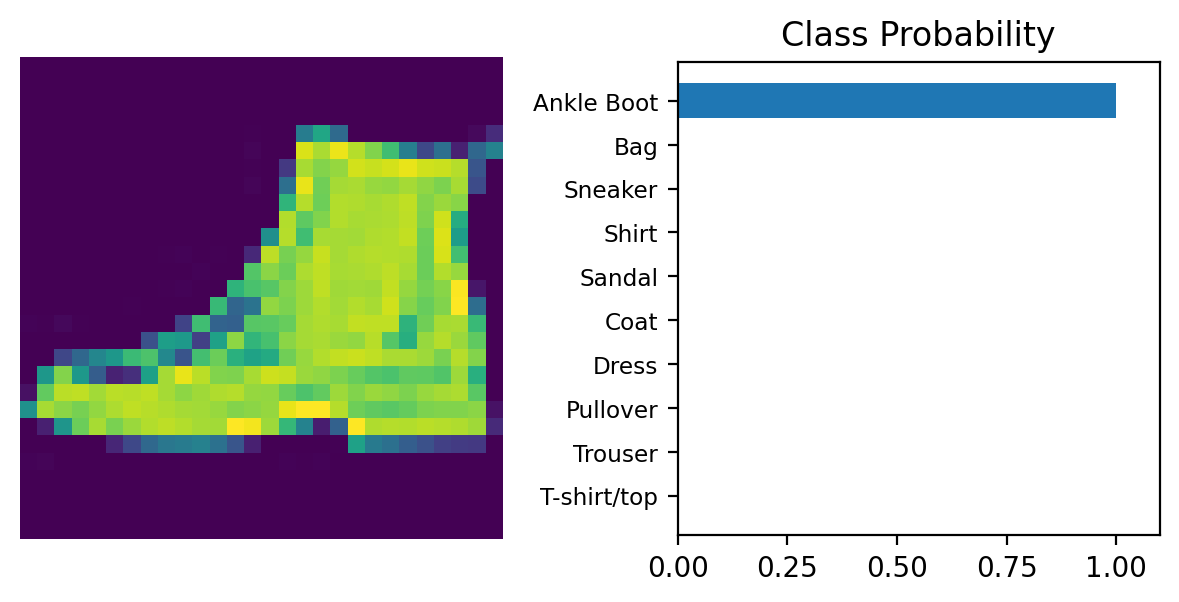

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))
# Deine Lösung ps = torch.exp(model(img)) ist absolut korrekt und der eleganteste Weg, das Problem hier zu lösen. Warum ist das richtig?
# 1.Modellausgabe: Dein Modell model hat als letzte Schicht nn.LogSoftmax(dim=1). Das bedeutet, wenn du ein Bild durch das Modell schickst (model(img)), ist das Ergebnis nicht der rohe "Score" (Logit), sondern bereits der Logarithmus der Wahrscheinlichkeit (log-probability).
#
# 2.Umwandlung: Um von den log-probabilities zu den tatsächlichen Wahrscheinlichkeiten zu gelangen, musst du die Umkehrfunktion des natürlichen Logarithmus anwenden. Das ist die Exponentialfunktion, in PyTorch torch.exp().

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')